## Hands-on - Probability Distributions and Variability

Name: Kamonnun Silarat <br>
Date: 26.03.2025

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [2]:
# Your code here:
print("Key statistics of the Dataset:")
print(df.describe())

Key statistics of the Dataset:
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692           2.663781   
min    1880.000000                 -0.440945          -1.346457   
25%    1913.250000                  1.632874           1.078740   
50%    1946.500000                  3.312992           2.915354   
75%    1979.750000                  5.587598           5.329724   
max    2013.000000                  9.326772           8.992126   

       Upper Error Bound  NOAA Adjusted Sea Level  
count         134.000000                21.000000  
mean            4.096016                 7.363746  
std             2.312581                 0.691038  
min             0.464567                 6.297493  
25%             2.240157                 6.848690  
50%             3.710630                 7.488353  
7

## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


In [3]:
# Your code here:
# Additonal Note: These cell and the cell below this are working together:
# The output results are below the next cell
def detect_outliers_iqr(df, column_name):
    # Drop missing values for the specified column
    col_data = df[column_name].dropna()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1 
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (col_data < lower_bound) | (col_data > upper_bound)
    
    print("Ouliers Data:")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {outliers.sum()}")

    return outliers

In [4]:
outliers_mask = detect_outliers_iqr(df, "CSIRO Adjusted Sea Level")
outliers_data = df[outliers_mask]
print(outliers_data)

Ouliers Data:
Q1: 1.63
Q3: 5.59
IQR: 3.95
Lower Bound: -4.30
Upper Bound: 11.52
Number of outliers: 0
Empty DataFrame
Columns: [Year, CSIRO Adjusted Sea Level, Lower Error Bound, Upper Error Bound, NOAA Adjusted Sea Level]
Index: []


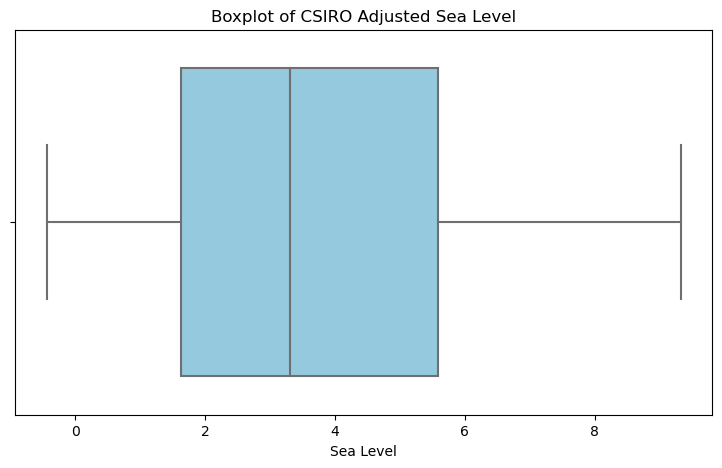

In [5]:
# Additional Cell for plotting Boxplot: (No outliers detected)
plt.figure(figsize=(9, 5))
sns.boxplot(x=df["CSIRO Adjusted Sea Level"], color="skyblue")
plt.title("Boxplot of CSIRO Adjusted Sea Level")
plt.xlabel("Sea Level")
plt.show()

## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?

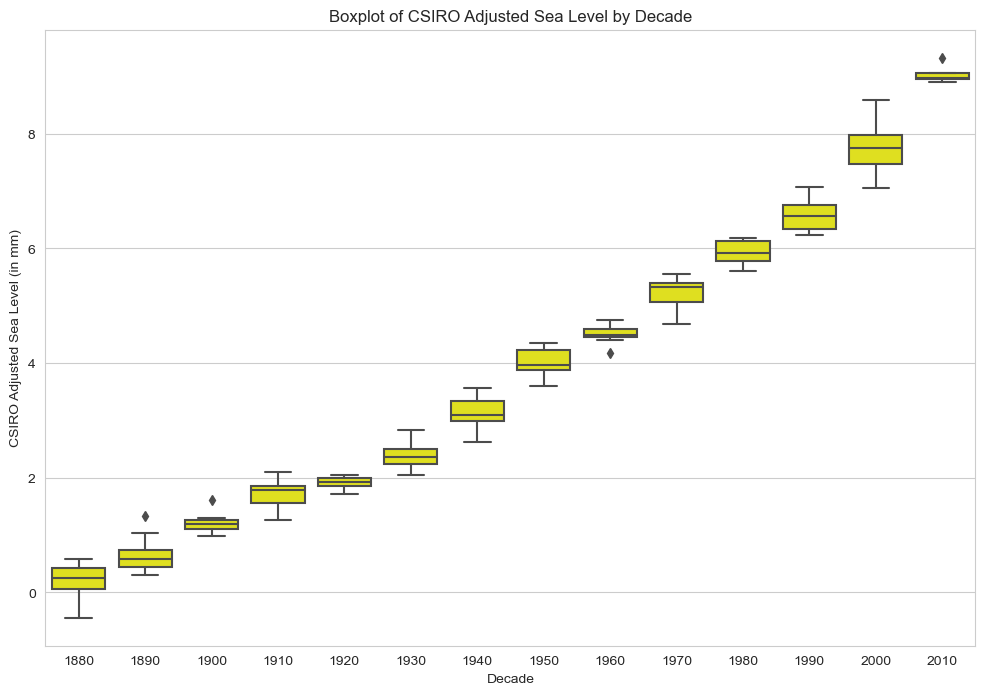

In [6]:
# Your code here:
# Make sure that 'Year' column is type of an integer
df['Year'] = df['Year'].astype(int)
# Create a new column 'Decade' with the year set to the nearest decade.
df['Decade'] = (df['Year'] // 10) * 10

# Plot the boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Decade', y='CSIRO Adjusted Sea Level', data=df, color="yellow")
plt.title('Boxplot of CSIRO Adjusted Sea Level by Decade')
plt.xlabel('Decade')
plt.ylabel('CSIRO Adjusted Sea Level (in mm)')
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  


In [7]:
# Your code here:
# Initialize the data for 20th and 21st centurites
sea_level_20th = df[(df['Year'] >= 1900) & (df['Year'] <= 1999)]['CSIRO Adjusted Sea Level']
sea_level_21st = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]['CSIRO Adjusted Sea Level']
# Drop missiing values
sea_level_20th = sea_level_20th.dropna()
sea_level_21st = sea_level_21st.dropna()

# Perform the two-sample t-test using stats module
t_stat, p_val = stats.ttest_ind(sea_level_21st, sea_level_20th, equal_var=False)  # Welch’s t-test

# Print the results
print("Two-sample t-test (21st Century vs 20th Century sea level):")
print(f"T-satistic: {t_stat:.4f}")
print(f"P-value: {p_val:.2f}") # less than 0.05 means it has a significant difference in sea level between two centuries

Two-sample t-test (21st Century vs 20th Century sea level):
T-satistic: 17.0626
P-value: 0.00


## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


Estimated mean: 3.63


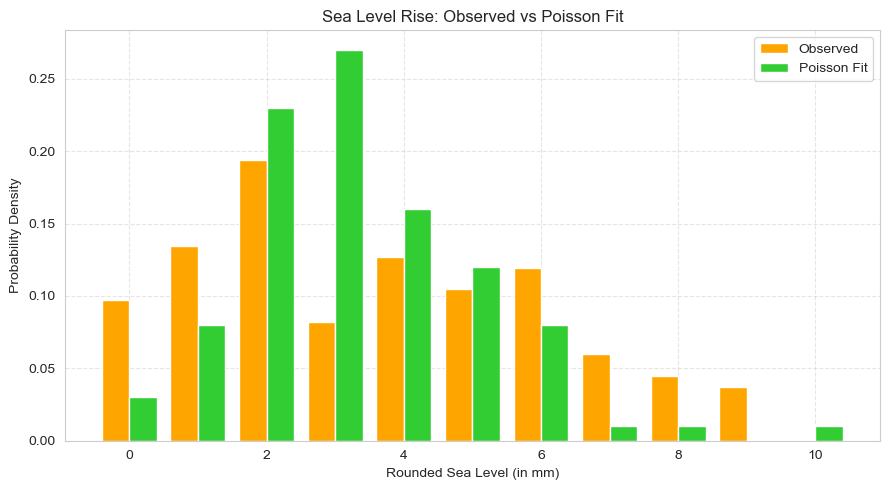

In [8]:
from scipy.stats import poisson

# Define the sea level count dataframe
sea_level_count = df["CSIRO Adjusted Sea Level"].dropna().round().astype(int)

# Estimate the data mean
estimated_mean = sea_level_count.mean()
print(f"Estimated mean: {estimated_mean:.2f}")

# Generate Poisson samples based on estimated mean for comparison
samples = poisson.rvs(mu=estimated_mean, size=100)

# Normalize to probability densities
bins = np.arange(min(sea_level_count.min(), samples.min()), max(sea_level_count.max(), samples.max()) + 2)
obs_hist, _ = np.histogram(sea_level_count, bins=bins)
poisson_hist, _ = np.histogram(samples, bins=bins)
obs_hist = obs_hist / obs_hist.sum()
poisson_hist = poisson_hist / poisson_hist.sum()
x = bins[:-1]
bar_width = 0.4

# Plot the histogram
plt.figure(figsize=(9, 5))
plt.bar(x - bar_width/2, obs_hist, width=bar_width, label="Observed", color="orange")
plt.bar(x + bar_width/2, poisson_hist, width=bar_width, label="Poisson Fit", color="limegreen")
plt.title("Sea Level Rise: Observed vs Poisson Fit")
plt.xlabel("Rounded Sea Level (in mm)")
plt.ylabel("Probability Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  

Correlation Matrix:                           CSIRO Adjusted Sea Level  NOAA Adjusted Sea Level
CSIRO Adjusted Sea Level                  1.000000                 0.976708
NOAA Adjusted Sea Level                   0.976708                 1.000000


,CSIRO Adjusted Sea Level,NOAA Adjusted Sea Level
CSIRO Adjusted Sea Level,1.000000,0.976708
NOAA Adjusted Sea Level,0.976708,1.000000


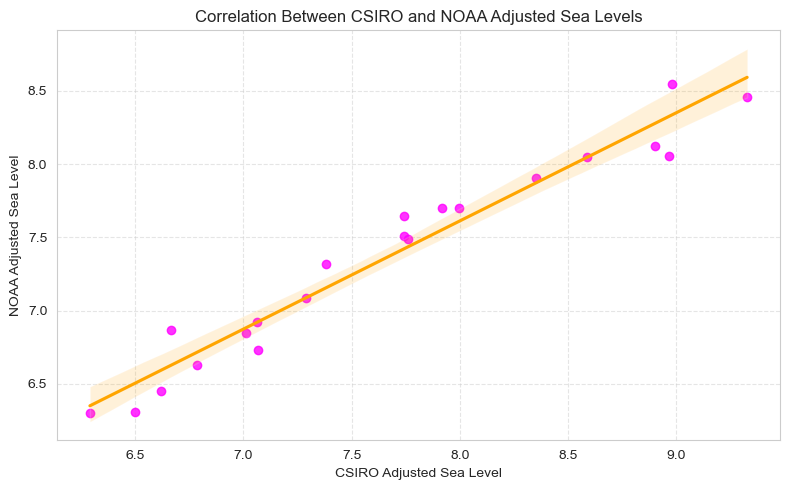

In [11]:
# Your code here:
# Define the correration for adjusted sea level(s) dataframe
correlation = df[['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level']].corr()
print("Correlation Matrix:", correlation)
display(correlation)

# # Plot the scatter plot
plt.figure(figsize=(8, 5))
sns.regplot(
    x='CSIRO Adjusted Sea Level',
    y='NOAA Adjusted Sea Level',
    data=df,
    scatter_kws={'color': 'magenta'},
    line_kws={'color': 'orange'}
)
plt.title("Correlation Between CSIRO and NOAA Adjusted Sea Levels")
plt.xlabel("CSIRO Adjusted Sea Level")
plt.ylabel("NOAA Adjusted Sea Level")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

**Summary of my findings:**

1. Outlier Detection for CSIRO Adjusted Sea Level:
- No outliers were detected based on the IQR method.
- The sea level values are within the normal range from 4.30 mm to 11.52 mm.

2. Sea Level Distribution by Decades:
- A boxplot by decade shows a visible upward trend in sea levels over time.

3. Hypothesis Testing for 21st vs 20th Century:
- A Welch’s T-test shows a statistically significant increase in mean sea level.

4. Probability Distribution Fit in Poisson distribution Format:
- The Poisson distribution was fit to the sea level in mean estimation.
- The histogram shows that Poisson is roughly consistent with the observed distribution, with no data being particularly salient. However, some variation suggests sea level rise might not be perfectly Poisson-distributed.

5. Correlation Analysis between CSIRO and NOAA sea level:
- The data has strong positive correlation  coefficient of 0.9767.
- The scatter plot with regression line confirms a strong linear relationship.